# Web traffic timeseries

https://www.kaggle.com/c/web-traffic-time-series-forecasting

## Build a basic model

In [6]:
import numpy as np
import pandas as pd

In [2]:
training_set_sample = pd.read_csv('train_1_sample.csv')

In [130]:
training_set_sample[0:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [178]:
p1_data = (np.array(training_set_sample)[:,1:2]).astype('float32')

In [179]:
p1_data

array([[ 18.],
       [ 11.],
       [  1.],
       ..., 
       [  1.],
       [  2.],
       [ 14.]], dtype=float32)

In [180]:
p1_data.shape

(2999, 1)

In [188]:
for i in range(0, len(p1_data)):
	if pd.isnull(p1_data[i]):
		p1_data[i] =avg

In [189]:
p1_x = []
p1_y = []
for i in range(100, len(p1_data)):
	p1_x.append(p1_data[i - 100: i, 0])
	p1_y.append(p1_data[i, 0])

p1_x_np = np.array(p1_x)
p1_x_np = np.reshape(p1_x_np, (p1_x_np.shape[0], p1_x_np.shape[1], 1))
p1_y_np = np.array(p1_y)

In [190]:
model = Sequential()

In [191]:
from keras.models import Sequential
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units = 10, input_shape= (p1_x_np.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p1_x_np, p1_y_np, epochs = 2)

pred_in = p1_data[100:200,0]
pred_in_r = np.reshape(pred_in, (-1,100,1))

model.predict(pred_in_r)

Epoch 1/2
2899/2899 [==============================] - 28s - loss: 18307.0709    
Epoch 2/2
2899/2899 [==============================] - 29s - loss: 18254.8689    


array([[ 2.72745204]], dtype=float32)

### Basic model with multiple pages as input

replace all NaN in each row with average of that row

In [288]:
training_set_sample.shape

(50, 551)

In [289]:
training_set_sample = training_set_sample[0:50]

In [290]:
def reshapek(k):
    return k.reshape(k.shape[0], k.shape[1], 1)

In [294]:
print(len(training_set_sample.iloc[10,1:]))

550


In [324]:
p = 100
p_x = np.array([[]])
p_y = np.array([])
for i in range(0, training_set_sample.shape[0]):
    row = training_set_sample.iloc[i,1:]
    avg = np.average(row[pd.notnull(row)])
    new_row = row.fillna(avg)
    for j in range(p, len(row)):
        #print(i, j)
        if i == 0 and j == p:
            p_x = new_row[0: p]
            p_y = new_row[p]
        else:
            p_x = np.vstack((p_x, new_row[j - p: j]))
            #print(p_x.shape)
            p_y = np.vstack((p_y, new_row[p]))
            #np.append(p_y, new_row[p])

In [314]:
print(p_x.shape)
print(p_y.shape)

(22500, 100)
(22500, 1)


In [315]:
from keras.models import Sequential
from keras.layers import LSTM

In [322]:
p_x_reshaped = p_x.reshape(p_x.shape[0], p_x.shape[1], 1)

In [321]:
model = Sequential()
model.add(LSTM(units = 10, input_shape= (pall_x.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p_x_reshaped, p_y, epochs = 2)

Epoch 1/2
22500/22500 [==============================] - 225s - loss: 874.2990   
Epoch 2/2
22500/22500 [==============================] - 211s - loss: 645.9307   


# Analyse the data

Load entire dataset

In [115]:
training_set = pd.read_csv('train_1.csv')

understand the shape

In [5]:
training_set.shape

(145063, 551)

look at a sample

In [6]:
training_set[0:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Split page column

In [ ]:
df_new = pd.DataFrame([i.split("_")[-3:] for i in training_set.Page], columns = ['project', 'access', 'agent'])

In [131]:
training_set = training_set.drop('Page', 1)

In [165]:
train_new = pd.concat([training_set, df_new], axis = 1)
train_new[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh.wikipedia.org,all-access,spider


## Fill NaNs /Drop

In [167]:
num_nans = train_new.isnull().T.any().sum()

In [572]:
train_new.shape[0]

145063

In [573]:
num_nans

27786

In [574]:
(float(num_nans)/train_new.shape[0]) * 100

19.154436348345204

In [169]:
train_no_na = train_new.dropna()

In [170]:
train_no_na.shape

(117277, 553)

In [171]:
train_no_na[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh.wikipedia.org,all-access,spider


### Analyze the project, access and agent

In [201]:
np.unique(train_no_na.agent.values)

array(['all-agents', 'spider'], dtype=object)

In [215]:
%matplotlib inline
from collections import Counter
def plothist(series):
    counter = Counter(series.values)
    pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar')

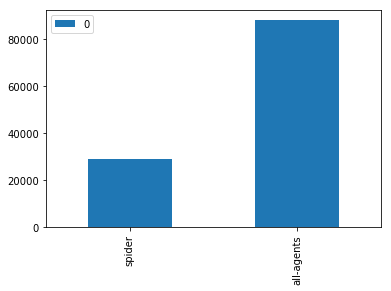

In [216]:
plothist(train_no_na.agent)

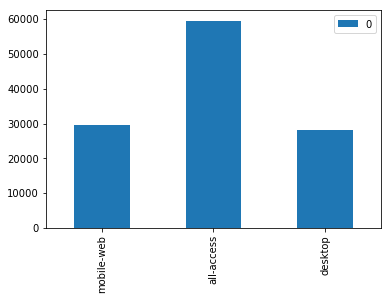

In [217]:
plothist(train_no_na.access)

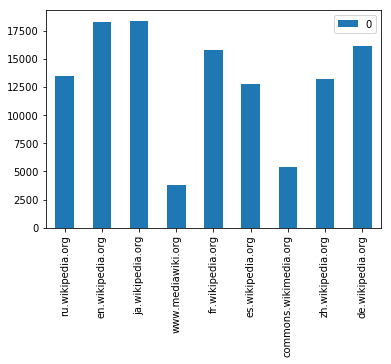

In [218]:
plothist(train_no_na.project)

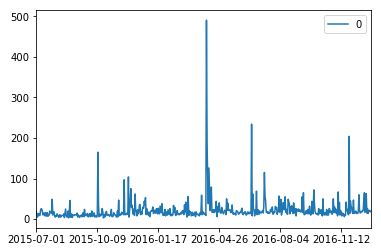

In [273]:
%matplotlib inline 
train_no_na.iloc[0:1,0:-3].T.plot()

# Strcuture the data for training

### To do

    1.how to include multiple features -> multivariate input. in keras (batch_size, timesteps, input_dim)
        1.1 effect of including features that are constant per input X(i) 
    2. check for trend, seasonality in time series
    3. make the series stationary if needed (based on 2)
    4. produce multi-step output
    5. normalize input - no needed since the scale is same
    6. check outliers
    7. structure the data to the form that Keras expects

Split the data into train, valid and test

In [575]:
data = train_no_na

In [299]:
#helper function to split dataset in to train, valid and test
def splitDataset(data, valid_perc, test_perc):
    p1, p2, p3 = (data.shape[0], int(data.shape[0]*valid_perc), int(data.shape[0]*test_perc))
    train = data[0:p1 - (p2+p3)]
    valid = data[p1 - (p2 + p3): p1 - p3]
    test = data [p1 - p3:]
    return (train, valid, test)

In [576]:
data[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh.wikipedia.org,all-access,spider


## Check for Trend, Seasonality

select only the time info columns

In [315]:
tr_data = data.iloc[:, 0:-3]

choose one series

In [317]:
tr_data_1 = tr_data[0:1]

In [335]:
tr_data_1.iloc[:,0:31]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0


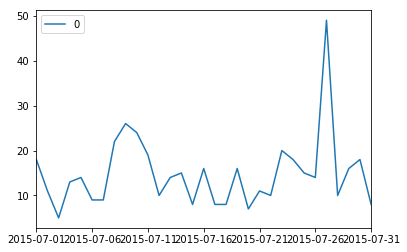

In [334]:
tr_data_1.iloc[:,0:31].T.plot()

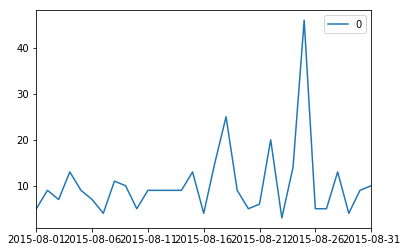

In [336]:
tr_data_1.iloc[:,31:62].T.plot()

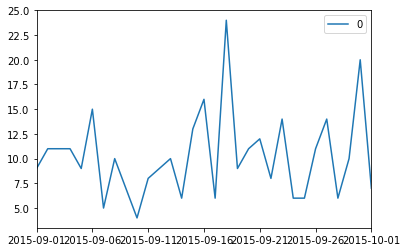

In [337]:
tr_data_1.iloc[:,62:93].T.plot()

## Check for weekly trends/seasonality

In [338]:
tr_data_1.shape

(1, 550)

In [344]:
tr_data_1.iloc[:,0],tr_data_1.iloc[:,549],

(0    18.0
 Name: 2015-07-01, dtype: float64, 0    20.0
 Name: 2016-12-31, dtype: float64)

In [360]:
tr_d_1_t = tr_data_1.T
tr_d_1_t.columns = ['views']

In [364]:
tr_d_1_t.index.name = 'date'

In [403]:
tr_d_1_t[0:5]

,views
date,
2015-07-01,18.0
2015-07-02,11.0
2015-07-03,5.0
2015-07-04,13.0
2015-07-05,14.0


In [369]:
type(tr_d_1_t.index)

pandas.core.indexes.base.Index

In [370]:
tr_d_1_t.index = pd.to_datetime(tr_d_1_t.index)

In [371]:
type(tr_d_1_t.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [377]:
weekly = tr_d_1_t.groupby(pd.TimeGrouper("W"))

In [383]:
weekly.size()[0:5]

date
2015-07-05    5
2015-07-12    7
2015-07-19    7
2015-07-26    7
2015-08-02    7
Freq: W-SUN, dtype: int64

In [421]:
weekly_data = np.array([[]])
if weekly_data.size == 0:
    print("empty")

empty


In [433]:
v = [1,2,3]
print(v)
v = [0] + v
print(v)
print(len(v))


[1, 2, 3]
[0, 1, 2, 3]
4


In [496]:
weekly_data = np.array([[]])
for g,v in weekly:
    views = v.values.T
    while views.size < 7:
        views = np.append([0], views)
    views = views.reshape((1, 7))
    if weekly_data.size == 0:
        weekly_data = views
    else:
        weekly_data = np.vstack((weekly_data, views))

array([  0.,   0.,  18.,  11.,   5.,  13.,  14.])

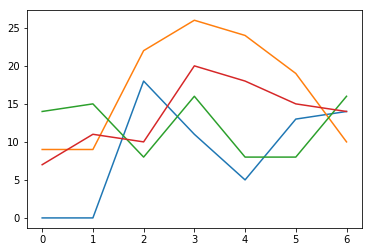

In [506]:
plt.figure(1)
for i in range(0, 4):
    plt.plot(weekly_data[i])
plt.show()

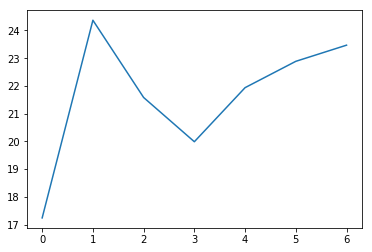

In [514]:
plt.plot(weekly_data.mean(axis = 0))
plt.show()

## Monthly

In [522]:
monthly = tr_d_1_t.groupby(pd.TimeGrouper("M"))
monthly_data = np.array([[]])
for g,v in monthly:
    views = v.values.T
    while views.size < 31:
        views = np.append([0], views)
    views = views.reshape((1, 31))
    if monthly_data.size == 0:
        monthly_data = views
    else:
        monthly_data = np.vstack((monthly_data, views))

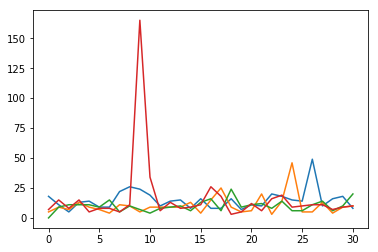

In [533]:
plt.figure(1)
for i in range(0, 4):
    plt.plot(monthly_data[i])
plt.show()

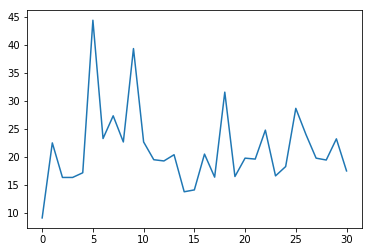

In [521]:
plt.plot(monthly_data.mean(axis = 0))
plt.show()

## Yearly

In [527]:
yearly = tr_d_1_t.groupby(pd.TimeGrouper("A"))
yearly_data = np.array([[]])
for g,v in yearly:
    views = v.values.T
    while views.size < 366:
        views = np.append([0], views)
    views = views.reshape((1, 366))
    if yearly_data.size == 0:
        yearly_data = views
    else:
        yearly_data = np.vstack((yearly_data, views))

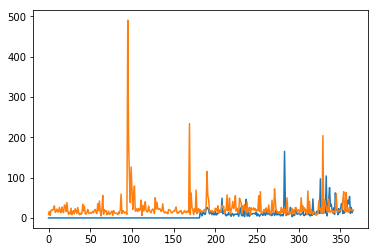

In [532]:
plt.figure(1)
for i in range(0, 2):
    plt.plot(yearly_data[i])
plt.show()

## Average accross all data

In [539]:
tr_data.shape

(117277, 550)

In [540]:
mean_data = tr_data.mean(axis = 0)

In [541]:
mean_data.shape

(550,)

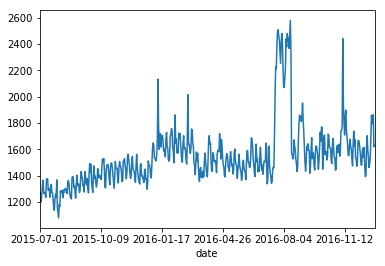

In [542]:
mean_data.plot()

In [544]:
mean_data.index = pd.to_datetime(mean_data.index)

## Weekly

In [545]:
m_weekly = mean_data.groupby(pd.TimeGrouper("W"))
m_weekly_data = np.array([[]])
for g,v in m_weekly:
    views = v.values.T
    while views.size < 7:
        views = np.append([0], views)
    views = views.reshape((1, 7))
    if m_weekly_data.size == 0:
        m_weekly_data = views
    else:
        m_weekly_data = np.vstack((m_weekly_data, views))

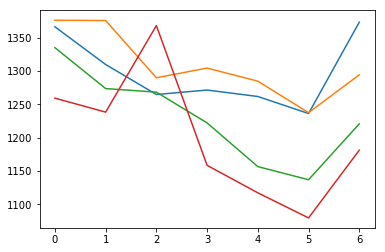

In [548]:
plt.figure(1)
for i in range(1, 5):
    plt.plot(m_weekly_data[i])
plt.show()

There seems to be some seasonality in weekly data

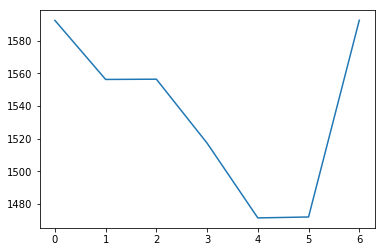

In [550]:
plt.plot(m_weekly_data.mean(axis =0))
plt.show()

## Monthly data

In [551]:
m_monthly = mean_data.groupby(pd.TimeGrouper("M"))
m_monthly_data = np.array([[]])
for g,v in m_monthly:
    views = v.values.T
    while views.size < 31:
        views = np.append([0], views)
    views = views.reshape((1, 31))
    if m_monthly_data.size == 0:
        m_monthly_data = views
    else:
        m_monthly_data = np.vstack((m_monthly_data, views))

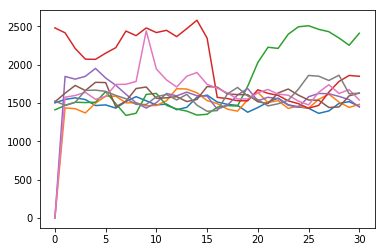

In [563]:
plt.figure(1)
for i in range(10, 18):
    plt.plot(m_monthly_data[i])
plt.show()

most of the weeks seems to follow same pattern, while there are few pages which behave differently 

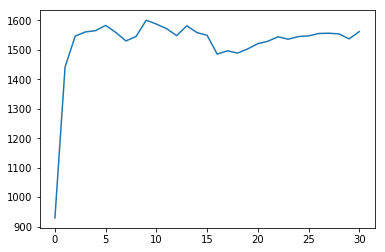

In [564]:
plt.plot(m_monthly_data.mean(axis =0))
plt.show()

## Yearly

In [565]:
m_yearly = tr_d_1_t.groupby(pd.TimeGrouper("A"))
m_yearly_data = np.array([[]])
for g,v in m_yearly:
    views = v.values.T
    while views.size < 366:
        views = np.append([0], views)
    views = views.reshape((1, 366))
    if m_yearly_data.size == 0:
        m_yearly_data = views
    else:
        m_yearly_data = np.vstack((m_yearly_data, views))

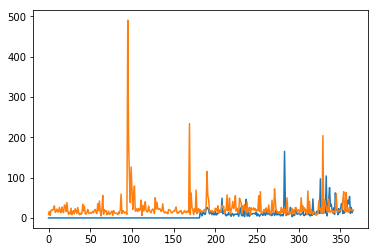

In [567]:
plt.figure(1)
for i in range(0, 2):
    plt.plot(m_yearly_data[i])
plt.show()

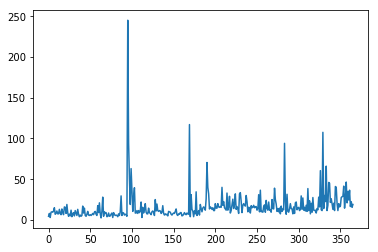

In [568]:
plt.plot(m_yearly_data.mean(axis =0))
plt.show()

## Structure the data

In [7]:
training_set = pd.read_csv('train_1.csv')

In [8]:
stationary_fields = pd.DataFrame([i.split("_")[-3:] for i in training_set.Page], columns = ['project', 'access', 'agent'])

In [9]:
training_set = training_set.drop('Page', 1)

In [10]:
training_set[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


fill NaNs with 0

In [11]:
training_set_no_na = training_set.fillna(0)

In [12]:
stationary_fields = pd.get_dummies(stationary_fields)

In [13]:
stationary_fields.shape

(145063, 14)

In [14]:
training_set_no_na.shape

(145063, 550)

for each training set, input is the stationary fields + #lag fields

In [15]:
lag = 3

In [95]:
import time

#num_examples = training_set_no_na.shape[0]
num_examples = 1000 #use smaller set to build model on laptop
x_d1 = num_examples * (training_set_no_na.shape[1] - lag)
x_d2 = lag + stationary_fields.shape[1]
data_x = np.empty((x_d1,x_d2))
data_y = np.empty((x_d1, 1))
#for reach training example
#training_set_no_na.shape[0]
progress = 0.0
for i in range(0, num_examples):
    #for each date, starting from lag+1
    row = training_set_no_na.iloc[i]
    stat_fields = stationary_fields.iloc[i]
    for j in range(lag, row.shape[0]):
        #append the stat_fields with each ow
        x = np.concatenate((row[j - lag:j], stat_fields))
        y = row[j]
        #initialize the arrays
        index = i*(training_set_no_na.shape[1] - lag) +(j - lag)
        if (index/float(x_d1))*100 - progress > 10:
            progress = (index/float(x_d1))*100
            print progress
        data_x[index]  = x
        data_y[index] = y

10.0001828154
20.0003656307
30.0005484461
40.0007312614
50.0009140768
60.0010968921
70.0012797075
80.0014625229
90.0016453382


In [96]:
data_x.shape

(547000, 17)

In [97]:
data_x[0:600]

array([[ 18.,  11.,   5., ...,   0.,   0.,   1.],
       [ 11.,   5.,  13., ...,   0.,   0.,   1.],
       [  5.,  13.,  14., ...,   0.,   0.,   1.],
       ..., 
       [ 94.,  77.,  78., ...,   0.,   0.,   1.],
       [ 77.,  78.,  20., ...,   0.,   0.,   1.],
       [ 78.,  20.,  24., ...,   0.,   0.,   1.]])

In [98]:
data_y.shape

(547000, 1)

In [99]:
training_set_no_na.shape

(145063, 550)

In [100]:
#helper function to split dataset in to train, valid and test
def splitDataset(data, valid_perc, test_perc):
    p1, p2, p3 = (data.shape[0], int(data.shape[0]*(valid_perc/100.0)), int(data.shape[0]*(test_perc/100.0)))
    print(p1, p2, p3)
    train = data[0:p1 - (p2+p3)]
    print("train", 0, (p1 - (p2+p3)))
    valid = data[p1 - (p2 + p3): p1 - p3]
    print("valid", (p1 - (p2+p3)), p1 - p3)
    test = data [p1 - p3:]
    print("test", (p1 - p3),data.shape[0])
    return (train, valid, test)

In [101]:
train_x, valid_x, test_x = splitDataset(data_x, 3, 5)

(547000, 16410, 27350)
('train', 0, 503240)
('valid', 503240, 519650)
('test', 519650, 547000)


In [102]:
print(train_x.shape, valid_x.shape, test_x.shape)

((503240, 17), (16410, 17), (27350, 17))


In [103]:
train_y, valid_y, test_y = splitDataset(data_y, 3, 5)

(547000, 16410, 27350)
('train', 0, 503240)
('valid', 503240, 519650)
('test', 519650, 547000)


In [104]:
print(train_y.shape, valid_y.shape, test_y.shape)

((503240, 1), (16410, 1), (27350, 1))


# Build the MODEL

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [114]:
def reshapeHelper(data, timesteps = 1):
    return data.reshape(data.shape[0], timesteps, data.shape[1])

In [125]:
def buildLSTMModel(X, Y, units = 1000):
    model = Sequential()
    print(X.shape)
    model.add(LSTM(units, input_shape=(1, X.shape[1])))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [126]:
model = buildLSTMModel(train_x, train_y)

(503240, 17)


In [124]:
model.fit(reshapeHelper(train_x), train_y, epochs = 2, validation_data=(reshapeHelper(valid_x), valid_y))

Train on 503240 samples, validate on 16410 samples
Epoch 1/2
 33728/503240 [=>............................] - ETA: 2064s - loss: 347725.4941

KeyboardInterrupt: 

In [110]:
test_x[0:2]

array([[ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.]])

In [111]:
model.predict(reshapeHelper(test_x[0:10,:]))

array([[ 0.57065868],
       [-0.25458193],
       [ 0.3020215 ],
       [ 1.44511509],
       [ 2.18687201],
       [ 1.59345198],
       [ 1.64974546],
       [ 4.75449419],
       [ 4.3200655 ],
       [ 3.94820452]], dtype=float32)

In [112]:
test_y[0:10]

array([[ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 9.],
       [ 2.],
       [ 1.],
       [ 2.]])

model seems to predict the same value